# STC Financial Analysis

This notebook performs a comprehensive financial analysis of STC (Saudi Telecom Company) data, including growth analysis, profitability ratios, financial position metrics, and visualizations.

## Importing Libraries

In [ ]:
# Import necessary libraries for data manipulation, analysis, and visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Loading and Exploration

In [2]:
# Load the STC raw data from the CSV file
stc_raw_data = pd.read_csv('stc_data.csv')

# Display the first few rows to understand the data structure
stc_raw_data.head()

,Year,Company_Name,Sector,Revenue_SAR,Net_Income_SAR,Operating_Income_SAR,Total_Assets_SAR,Total_Liabilities_SAR
0,2019,STC,Telecommunications,54367531,10924831,12480393,44841492,55271210
1,2020,STC,Telecommunications,58953318,11185197,12731125,121972100,56705085
2,2021,STC,Telecommunications,63416977,11594697,13127755,127779417,56393438
3,2022,STC,Telecommunications,67431546,12386922,15088441,137219986,61194394
4,2023,STC,Telecommunications,71777161,13419479,13161291,159645869,78130703


In [3]:
# Get a summary of the dataset including data types and non-null counts
stc_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   6 non-null      int64 
 1   Company_Name           6 non-null      object
 2   Sector                 6 non-null      object
 3   Revenue_SAR            6 non-null      int64 
 4   Net_Income_SAR         6 non-null      int64 
 5   Operating_Income_SAR   6 non-null      int64 
 6   Total_Assets_SAR       6 non-null      int64 
 7   Total_Liabilities_SAR  6 non-null      int64 
dtypes: int64(6), object(2)
memory usage: 516.0+ bytes


## Data Preparation

Note: Gross Profit was excluded from the analysis due to the absence of a clearly disclosed cost of revenue structure in STC’s financial statements.

In [4]:
# Sort the data by year to ensure chronological order
stc_raw_data = stc_raw_data.sort_values(by='Year').reset_index(drop=True)

# Define the numeric columns that need to be converted
numeric_cols = ['Revenue_SAR', 'Net_Income_SAR','Operating_Income_SAR','Total_Assets_SAR', 'Total_Liabilities_SAR']

# Convert the specified columns to numeric type, coercing errors to NaN
stc_raw_data[numeric_cols] = stc_raw_data[numeric_cols].apply(pd.to_numeric, errors='coerce').astype(float)

# Display the prepared data
stc_raw_data

,Year,Company_Name,Sector,Revenue_SAR,Net_Income_SAR,Operating_Income_SAR,Total_Assets_SAR,Total_Liabilities_SAR
0,2019,STC,Telecommunications,54367531.0,10924831.0,12480393.0,44841492.0,55271210.0
1,2020,STC,Telecommunications,58953318.0,11185197.0,12731125.0,121972100.0,56705085.0
2,2021,STC,Telecommunications,63416977.0,11594697.0,13127755.0,127779417.0,56393438.0
3,2022,STC,Telecommunications,67431546.0,12386922.0,15088441.0,137219986.0,61194394.0
4,2023,STC,Telecommunications,71777161.0,13419479.0,13161291.0,159645869.0,78130703.0
5,2024,STC,Telecommunications,75893413.0,24916243.0,14425638.0,160638143.0,68153096.0


In [ ]:
# Create a copy of the raw data for analysis to avoid modifying the original
stc_new_data = stc_raw_data.copy()

## Growth Analysis

In [6]:
# Calculate Year-over-Year Growth for Revenue
stc_new_data['Revenue_Growth_%'] = stc_new_data['Revenue_SAR'].pct_change() * 100

# Define a function to calculate Compound Annual Growth Rate (CAGR)
def calculate_cagr(start_value, end_value, periods):
    return ((end_value / start_value) ** (1 / periods) - 1) * 100

# Calculate and display the CAGR for Revenue
cagr_revenue = calculate_cagr(stc_new_data['Revenue_SAR'].iloc[0], stc_new_data['Revenue_SAR'].iloc[-1], len(stc_new_data)-1)
print(f"Revenue CAGR: {cagr_revenue:.2f}%")

6.898815899263733


## Profitability Ratios

In [7]:
# Calculate Operating Margin as a percentage
stc_new_data['Operating_Margin_%'] = (stc_new_data['Operating_Income_SAR'] / stc_new_data['Revenue_SAR']) * 100

# Calculate Net Profit Margin as a percentage
stc_new_data['Net_Profit_Margin_%'] = (stc_new_data['Net_Income_SAR'] / stc_new_data['Revenue_SAR']) * 100

# Display the profitability ratios
print(stc_new_data[['Year', 'Operating_Margin_%', 'Net_Profit_Margin_%']])

   Year  Operating_Margin_%  Net_Profit_Margin_%
0  2019           22.955600            20.094403
1  2020           21.595265            18.972973
2  2021           20.700695            18.283270
3  2022           22.375938            18.369625
4  2023           18.336321            18.696029
5  2024           19.007760            32.830574


## Financial Position

In [8]:
# Calculate Leverage Ratio: Liabilities to Assets as a percentage
stc_new_data['Liabilities_to_Assets_Ratio'] = (stc_new_data['Total_Liabilities_SAR'] / stc_new_data['Total_Assets_SAR']) * 100

# Calculate Asset Turnover Ratio
stc_new_data['Asset_Turnover_Ratio'] = stc_new_data['Revenue_SAR'] / stc_new_data['Total_Assets_SAR']

# Display the financial position ratios
print(stc_new_data[['Year', 'Liabilities_to_Assets_Ratio', 'Asset_Turnover_Ratio']])

   Year  Liabilities_to_Assets_Ratio  Asset_Turnover_Ratio
0  2019                   123.259079              1.212438
1  2020                    46.490210              0.483334
2  2021                    44.133429              0.496300
3  2022                    44.595832              0.491412
4  2023                    48.940009              0.449602
5  2024                    42.426472              0.472450


## Visualizations

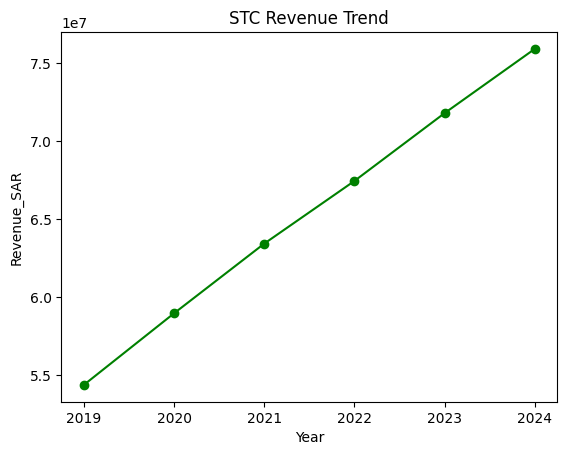

In [9]:
# Visualize Revenue Trend over Years
plt.figure(figsize=(10, 6))
plt.plot(stc_new_data["Year"], stc_new_data["Revenue_SAR"], marker='o', linestyle='-', color='green')
plt.title("STC Revenue Trend")
plt.xlabel("Year")
plt.ylabel("Revenue (SAR)")
plt.grid(True)
plt.show()

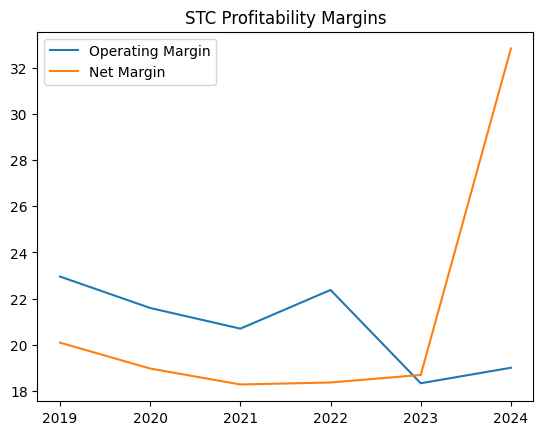

In [11]:
# Visualize Profitability Margins over Years
plt.figure(figsize=(10, 6))
plt.plot(stc_new_data["Year"], stc_new_data["Operating_Margin_%"], label="Operating Margin", marker='o')
plt.plot(stc_new_data["Year"], stc_new_data["Net_Profit_Margin_%"], label="Net Profit Margin", marker='s')
plt.legend()
plt.title("STC Profitability Margins Over Time")
plt.xlabel("Year")
plt.ylabel("Margin (%)")
plt.grid(True)
plt.show()

## Saving Analysis Results

In [12]:
# Save the analysis results to a CSV file
stc_new_data.to_csv('stc_analysis_results.csv', index=False)
print("Analysis results saved to 'stc_analysis_results.csv'")

Analysis results saved to 'stc_analysis_results.csv'


## Conclusion

This notebook has provided a comprehensive analysis of STC's financial data, including growth metrics, profitability ratios, financial position, and visualizations. The results have been saved for further use.